mass ratio is  0.593839512861 +/- 0.000101861726488
Periodogram peaks above a power of 0.25: [ 0.04614961  0.08109059  0.10348866  0.23070967  0.27281803  0.42691671
  0.60251754  2.93549997]


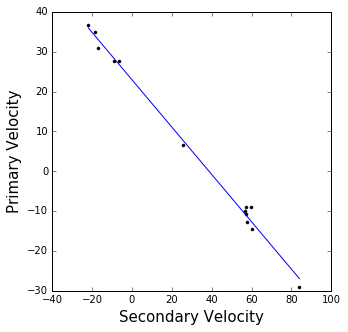

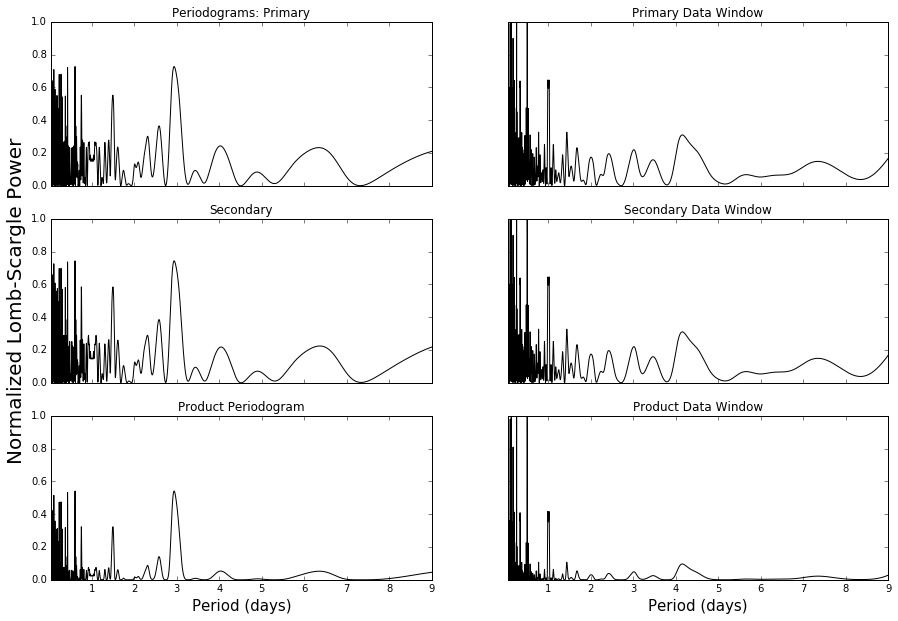

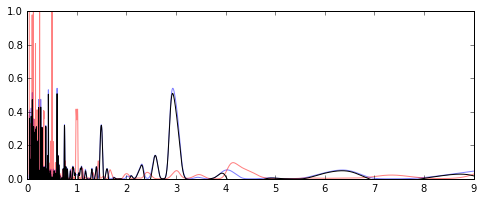

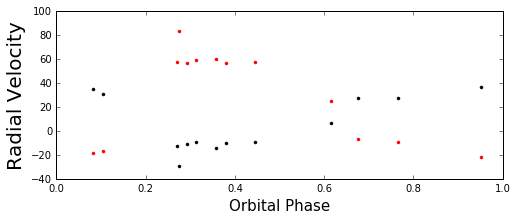

In [1]:
#import-libraries-and-data---------------------------------------------------------------------------------------#
import time
import sys
import emcee
import corner
import numpy as np
import functions as f
from scipy import stats
from matplotlib import pyplot as plt
from scipy.signal import lombscargle
%matplotlib inline
#filename     = 'Systems/2M03450783+3102335/4586_2M03450783+3102335_rvs.tbl'
#system       = np.genfromtxt(filename, skip_header=1, usecols=(0, 1, 2))

#define-functions------------------------------------------------------------------------------------------------#

periodogram    = f.periodogram
dataWindow     = f.dataWindow
maxima         = f.maxima
phases         = f.phases
adjustment     = f.adjustment
RV             = f.RV
residuals      = f.residuals
constraints    = f.constraints
constraintsNoE = f.constraintsNoE
alteredRV      = f.alteredRV
initialGuess   = f.initialGuess
noERV          = f.noERV
alteredNoERV   = f.alteredNoERV
initialGuessNoE= f.initialGuessNoE

#function calculates mass ratio and error of both the regression and the slope parameter
def massRatio(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    R2 = r_value**2
    x_bar = np.asarray(x).mean()
    sx2 = ((x-x_bar)**2).sum()
    slope_err = std_err * np.sqrt(1./sx2)
    return -slope, intercept, R2, std_err, slope_err

#set true parameters
mr = 0.6 #mass ratio
x = np.array([2540, 2542, 2543, 2546, 2550, 2552, 2555, 2560, 2562, 2563, 2563.5, 2564, 2564.5])
parameters = 50, 0.5, 1.3, 2554, 3, 15
RVp, RVs = RV(x, mr, parameters)
for i in range(len(RVp)):
    RVp[i] = RVp[i] + 2*np.random.randn()
    RVs[i] = RVs[i] + 2*np.random.randn()

#fake the data



#define-variables------------------------------------------------------------------------------------------------#

JD           = x 
JDp, JDs     = JD, JD
samples      = 10000
max_period   = 9
power_cutoff = 0.4
ndim, nwalkers, nsteps = 6, 600, 10000

#now-do-things!--------------------------------------------------------------------------------------------------#

#plot Wilkinson plot (mass ratio)
mass_ratio, intercept, r_squared, standard_error, slope_error = massRatio(RVs, RVp)
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(RVs, RVp, 'k.')
x, y = np.array([np.nanmin(RVs), np.nanmax(RVs)]),-mass_ratio*np.array([np.nanmin(RVs), 
                                                                        np.nanmax(RVs)])+intercept
ax.plot(x, y)
ax.set_ylabel('Primary Velocity', size='15')
ax.set_xlabel('Secondary Velocity', size='15')
print('mass ratio is ', mass_ratio, "+/-", slope_error)

#check RV measurements for the need to be adjusted and adjust them if so
JDp, RVp = adjustment(JD, RVp)
JDs, RVs = adjustment(JD, RVs)

#calculate periodograms
x, y  = periodogram(JDp, RVp, samples, max_period)
y2    = periodogram(JDs, RVs, samples, max_period)[1]
y3,y4 = dataWindow(JDp, samples, max_period)[1], dataWindow(JDs, samples, max_period)[1]

#plot periodograms
fig, ((ax1,ax4),(ax2,ax5),(ax3,ax6)) = plt.subplots(3, 2, sharex='col', sharey='row')
ax1.plot(x, y, 'k')
ax1.set_title('Periodograms: Primary')
ax1.set_xlim(1/24, max_period)
ax4.set_xlim(1/24, max_period)
ax2.plot(x, y2, 'k')
ax2.set_title('Secondary')
ax3.plot(x, y*y2, 'k')
ax3.set_title('Product Periodogram')
ax4.plot(x, y3, 'k')
ax4.set_title('Primary Data Window')
ax5.plot(x, y4, 'k')
ax5.set_title('Secondary Data Window')
ax6.plot(x, y3*y4, 'k')
ax6.set_title('Product Data Window')
ax3.set_xlabel('Period (days)', size='15')
ax6.set_xlabel('Period (days)', size='15')
ax2.set_ylabel('Normalized Lomb-Scargle Power', size='20')
fig.set_figheight(10)
fig.set_figwidth(15)
#plt.savefig(filename + ' periodogram.pdf')
print('Periodogram peaks above a power of 0.25:', maxima(power_cutoff, x, y, y2))

#plot periodogram - data window
fig = plt.figure(figsize=(8,3))
ax = plt.subplot(111)
ax.plot(x, y*y2, 'b', alpha = 0.5)
ax.plot(x, y3*y4, 'r', alpha = 0.5)
ax.plot(x, y*y2-y3*y4, 'k', alpha = 1)
ax.set_ylim(0,1)
ax.set_title('')

#plot phased RVs
fig = plt.figure(figsize=(8,3))
ax = plt.subplot(111)
ax.plot(phases(maxima(power_cutoff, x, y, y2)[-1], 0, JDp), RVp, 'k.')
ax.plot(phases(maxima(power_cutoff, x, y, y2)[-1], 0, JDs), RVs, 'r.')
ax.set_title('')
ax.set_xlabel('Orbital Phase', size='15')
ax.set_ylabel('Radial Velocity', size='20')
#plt.savefig(filename + ' RV-phase diagram.pdf')

/Users/skinnej3/anaconda/lib/python3.5/site-packages/emcee-2.1.0-py3.5.egg/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
/Users/skinnej3/anaconda/lib/python3.5/site-packages/emcee-2.1.0-py3.5.egg/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater


 1.0%
 2.0%
 3.0%
 4.0%
 5.0%
 6.0%
 7.0%
 8.0%
 9.0%
10.0%
11.0%
12.0%
13.0%
14.0%
15.0%
16.0%
17.0%
18.0%
19.0%
20.0%
21.0%
22.0%
23.0%
24.0%
25.0%
26.0%
27.0%
28.0%
29.0%
30.0%
31.0%
32.0%
33.0%
34.0%
35.0%
36.0%
37.0%
38.0%
39.0%
40.0%
41.0%
42.0%
43.0%
44.0%
45.0%
46.0%
47.0%
48.0%
49.0%
50.0%
51.0%
52.0%
53.0%
54.0%
55.0%
56.0%
57.0%
58.0%
59.0%
60.0%
61.0%
62.0%
63.0%
64.0%
65.0%
66.0%
67.0%
68.0%
69.0%
70.0%
71.0%
72.0%
73.0%
74.0%
75.0%
76.0%
77.0%
78.0%
79.0%
80.0%
81.0%
82.0%
83.0%
84.0%
85.0%
86.0%
87.0%
88.0%
89.0%
90.0%
91.0%
92.0%
93.0%
94.0%
95.0%
96.0%
97.0%
98.0%
99.0%
100.0%
Completed in  16  minutes and  19 seconds.


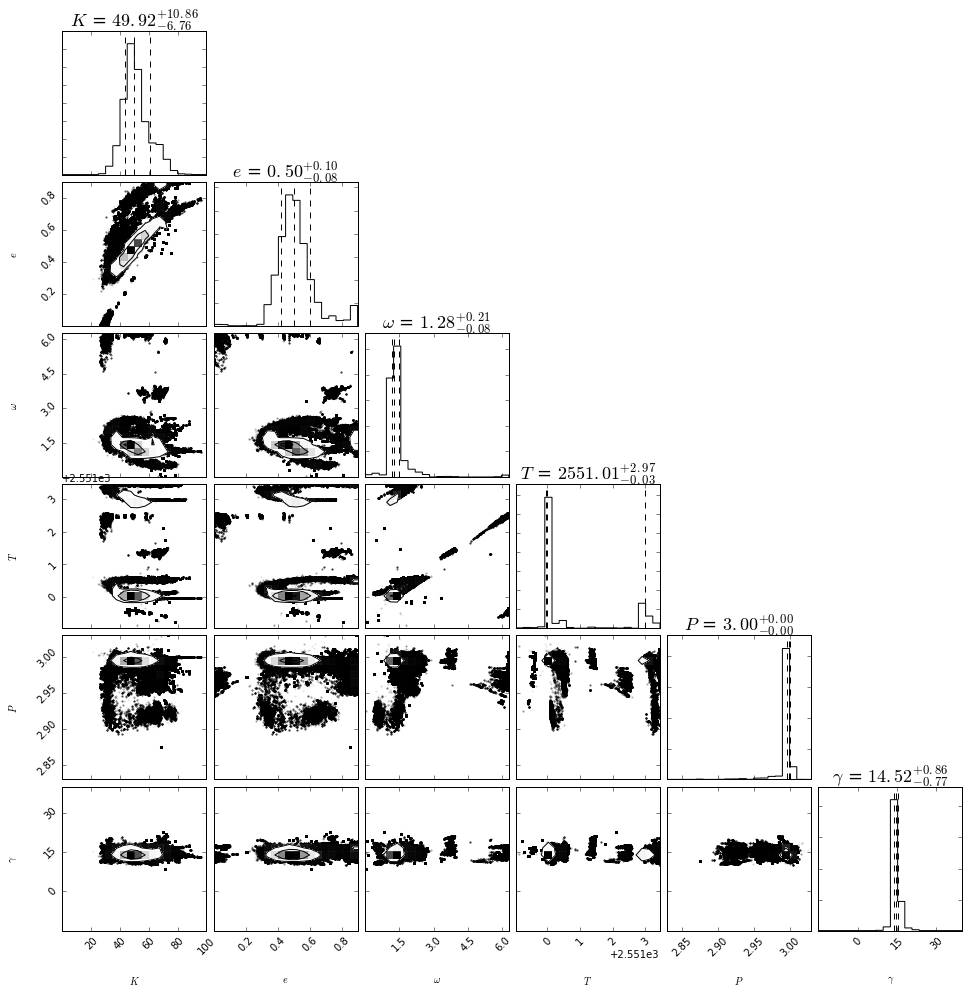

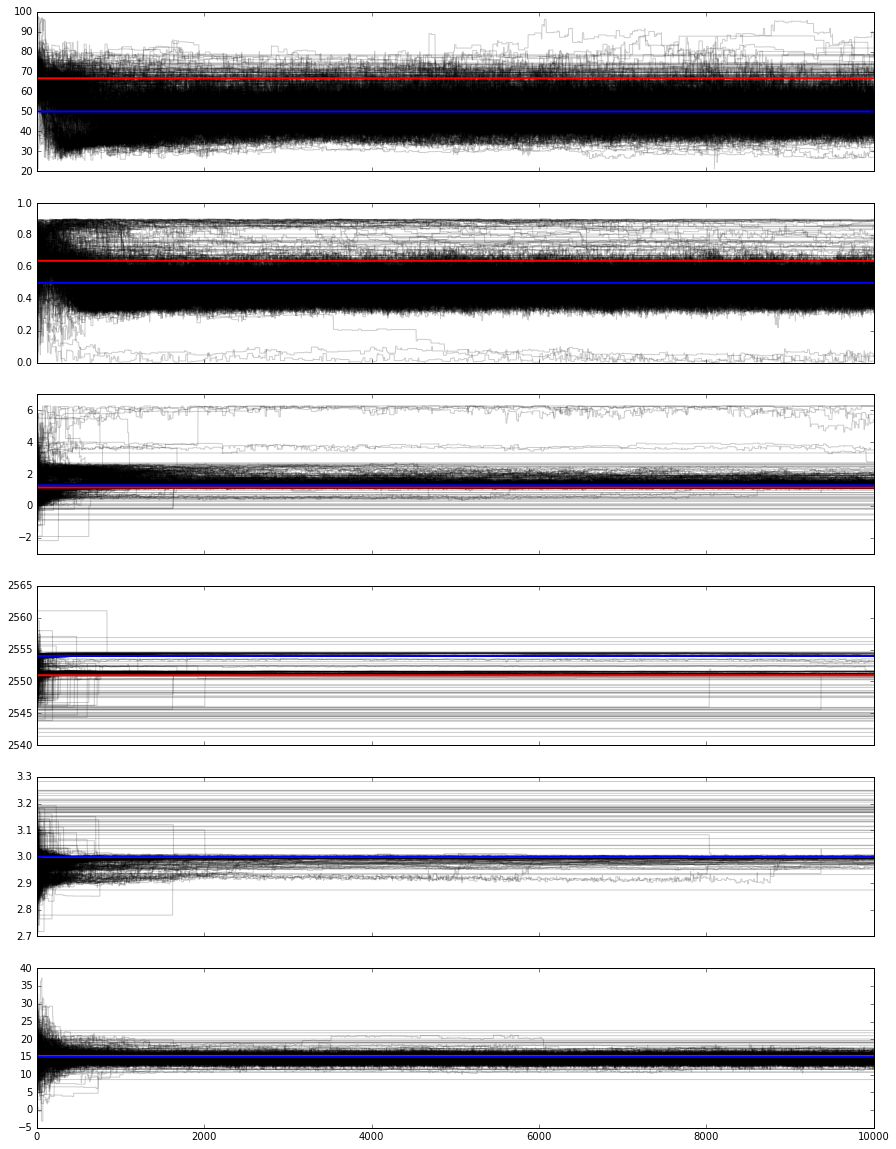

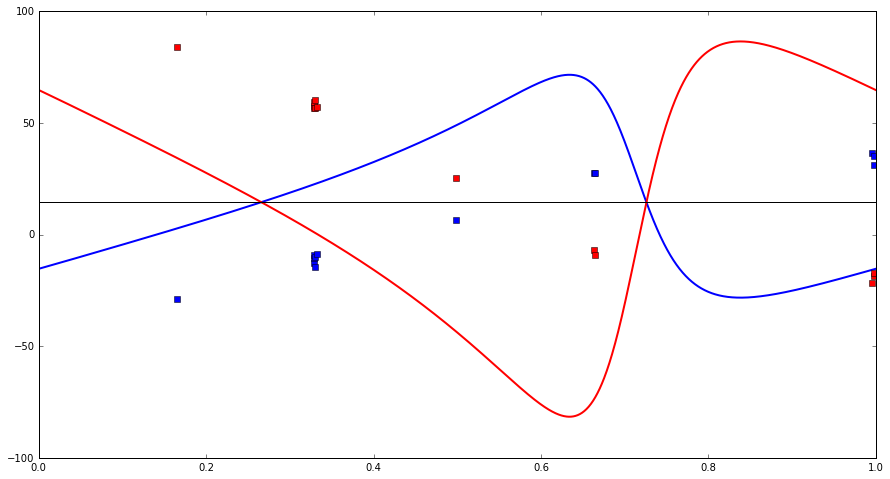

In [2]:
t0 = time.time()

#constrain parameters
lower_bounds = [0, 0, 0, JD[0]+((JD[-1]-JD[0])/2)-0.75*2.93, 2.83, -15]
upper_bounds = [100, 0.9, 2*np.pi, JD[0]+((JD[-1]-JD[0])/2)+0.75*2.93, 3.03, 40]

initial_guess = initialGuess(lower_bounds, upper_bounds, JDp, RVp)

def likelihood(parameters, mass_ratio, primary, secondary):
    r = np.sqrt(sum((np.asarray(primary)-RV(JDp, mass_ratio, parameters)[0])**2)
        +sum((np.asarray(secondary)-RV(JDs, mass_ratio, parameters)[1])**2))
    return -r

#function is poorly named, returns the negative infinity if parameters lie outside contraints, otherwise
#returns the output from residuals()
def probability(initial_guess, mass_ratio, RVp, RVs, lower, upper):
    con = constraints(initial_guess, lower, upper)
    if not np.isfinite(con):
        return -np.inf
    return con + likelihood(initial_guess, mass_ratio, RVp, RVs)



#initialize walkers 
position = [initial_guess + 0.1*np.random.randn(ndim) for i in range(nwalkers)]

#walkers distributed in gaussian ball around most likely parameter values
for i in range(0, nwalkers-1):
    position[i][0] = initial_guess[0] + 5  *np.random.randn(1) #K
    position[i][1] = initial_guess[1] + 0.1*np.random.randn(1) #e
    position[i][2] = initial_guess[2] + 1  *np.random.randn(1) #w
    position[i][3] = initial_guess[3] +3   *np.random.randn(1) #T
    position[i][4] = initial_guess[4] + 0.1*np.random.randn(1) #P
    position[i][5] = initial_guess[5] + 3  *np.random.randn(1) #y

#create the sampler object and do the walk
sampler = emcee.EnsembleSampler(nwalkers, ndim, probability,
                                args=(mass_ratio, RVp, RVs, lower_bounds, upper_bounds), threads = 4)
sampler.run_mcmc(position, nsteps)

#save the results of the walk
samples = sampler.chain[:, 1000:, :].reshape((-1, ndim))
results = np.asarray(list(map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                              zip(*np.percentile(samples, [16, 50, 84], axis=0)))))

#create the corner plot
fig = corner.corner(samples, labels=["$K$", "$e$", "$\omega$", "$T$", "$P$", "$\gamma$"],
                    extents=[[lower_bounds[0], upper_bounds[0]], [lower_bounds[1],upper_bounds[1]],
                             [lower_bounds[2], upper_bounds[2]],
                             [lower_bounds[3], upper_bounds[3]], [lower_bounds[4], upper_bounds[4]],
                             [lower_bounds[5], upper_bounds[5]]],
                    quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 18})
#fig.savefig("parameter_results.png")

#create the walkers plot
fig, ax = plt.subplots(ndim, 1, sharex='col')
for i in range(ndim):
    for j in range(len(sampler.chain[:, 0, i])):
        ax[i].plot(np.linspace(0, nsteps, num=nsteps), sampler.chain[j, :, i], 'k', alpha=0.2)
    ax[i].plot(np.linspace(0, nsteps, num=nsteps) , np.ones(nsteps)*initial_guess[i], 'r', lw=2)
    ax[i].plot(np.linspace(0, nsteps, num=nsteps) , np.ones(nsteps)*parameters[i], 'b', lw=2)
fig.set_figheight(20)
fig.set_figwidth(15)
#plt.savefig('walk_results.png')

#create the curves plot
x = np.linspace(0, 15.8, num=nsteps)
fig, ax = plt.figure(figsize=(15,8)), plt.subplot(111)
#commented out section shows a sampling of curves from the walk
#for K, e, w, T, P, y in samples[np.random.randint(len(samples), size=250)]:
#    parameters = K, e, w, T, P, y
#    primary, secondary = RV(x, mass_ratio, parameters)
#    ax.plot(x/parameters[4], primary, 'c', label='Potential Primary Curves', alpha=0.2)
#    ax.plot(x/parameters[4], secondary, 'm', label='Potential Secondary Curves', alpha=0.2)
primary, secondary = RV(x, mass_ratio, [results[0][0], results[1][0], results[2][0],
                                        results[3][0], results[4][0], results[5][0]])
ax.plot(x/results[4][0], primary, 'b', lw=2)
ax.plot(x/results[4][0], secondary, 'r', lw=2)
ax.plot(x, np.ones(len(x))*results[5][0], 'k' , label='Systemic Velocity')
ax.plot(phases(results[4][0], results[3][0], JDp), RVp, 'bs', label='Primary RV Data') #data phased to result period
ax.plot(phases(results[4][0], results[3][0], JDs), RVs, 'rs', label='Secondary RV data')
ax.set_xlim([0,1])
#plt.savefig('curve_results.png')

for i, result in enumerate(sampler.sample(position, iterations=nsteps)):
    if (i+1) % 100 == 0:
        print("{0:5.1%}".format(float(i) / nsteps))
        
t = time.time()
print('Completed in ', int((t-t0)/60), ' minutes and ', int(((t-t0)/60-int((t-t0)/60))*60), 'seconds.')

In [ ]:
#no e MCMC
t0 = time.time()

#adjustments for a circular fit
ndim = 4
del lower_bounds[1:3], upper_bounds[1:3]

initial_guess = initialGuessNoE(lower_bounds, upper_bounds, JDp, RVp)

def likelihood(parameters, mass_ratio, primary, secondary):
    r = np.sqrt(sum((np.asarray(primary)-noERV(JDp, mass_ratio, parameters)[0])**2)
        +sum((np.asarray(secondary)-noERV(JDs, mass_ratio, parameters)[1])**2))
    return -r

#function is poorly named, returns the negative infinity if parameters lie outside contraints, otherwise
#returns the output from residuals()
def probability(initial_guess, mass_ratio, RVp, RVs, lower, upper):
    con = constraintsNoE(initial_guess, lower, upper)
    if not np.isfinite(con):
        return -np.inf
    return con + likelihood(initial_guess, mass_ratio, RVp, RVs)

#initialize walkers 
position = [initial_guess + 0.1*np.random.randn(ndim) for i in range(nwalkers)]

#walkers distributed in gaussian ball around most likely parameter values
for i in range(nwalkers):
    position[i][0] = initial_guess[0] + 2.5*np.random.randn(1) #K
    position[i][1] = initial_guess[1] +     np.random.randn(1) #T
    position[i][2] = initial_guess[2] + 0.1*np.random.randn(1) #P
    position[i][3] = initial_guess[3] + 3  *np.random.randn(1) #y

#create the sampler object and do the walk
sampler = emcee.EnsembleSampler(nwalkers, ndim, probability,
                                args=(mass_ratio, RVp, RVs, lower_bounds, upper_bounds), threads = 4)
sampler.run_mcmc(position, nsteps)

#save the results of the walk

samples = sampler.chain[:, :, :].reshape((-1, ndim))

results = np.asarray(list(map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                              zip(*np.percentile(samples, [16, 50, 84], axis=0)))))

#create the corner plot
fig = corner.corner(samples, labels=["$K$", "$T$", "$P$", "$\gamma$"],
                    extents=[[lower_bounds[0], upper_bounds[0]], [lower_bounds[1],upper_bounds[1]],
                             [lower_bounds[2], upper_bounds[2]], [lower_bounds[3], upper_bounds[3]]],
                    quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 18})
#plt.savefig('parameter_results.png')

#create the walkers plot
fig, ax = plt.subplots(ndim, 1, sharex='col')
for i in range(ndim):
    for j in range(len(sampler.chain[:, 0, i])):
        ax[i].plot(np.linspace(0, nsteps, num=nsteps), sampler.chain[j, :, i], 'k', alpha=0.2)
    ax[i].plot(np.linspace(0, nsteps, num=nsteps) , np.ones(nsteps)*initial_guess[i], 'r')
    ax[i].plot(np.linspace(0, nsteps, num=nsteps) , np.ones(nsteps)*parameters[i], 'b', lw=2)
fig.set_figheight(20)
fig.set_figwidth(15)
#plt.savefig('walk_results.png')

#create the curves plot
x = np.linspace(0, 15.8, num=nsteps)
fig, ax = plt.figure(figsize=(15,8)), plt.subplot(111)
#commented out section shows a sampling of curves from the walk
#for K, e, w, T, P, y in samples[np.random.randint(len(samples), size=250)]:
#    parameters = K, e, w, T, P, y
#    primary, secondary = RV(x, mass_ratio, parameters)
#    ax.plot(x/parameters[4], primary, 'c', label='Potential Primary Curves', alpha=0.2)
#    ax.plot(x/parameters[4], secondary, 'm', label='Potential Secondary Curves', alpha=0.2)
primary, secondary = noERV(x, mass_ratio, [results[0][0], results[1][0], results[2][0], results[3][0]])
ax.plot(x/results[2][0], primary, 'b', lw=2)
ax.plot(x/results[2][0], secondary, 'r', lw=2)
ax.plot(x, np.ones(len(x))*results[3][0], 'k' , label='Systemic Velocity')
ax.plot(phases(results[2][0], results[1][0], JDp), RVp, 'bs', label='Primary RV Data') #data phased to result period
ax.plot(phases(results[2][0], results[1][0], JDs), RVs, 'rs', label='Secondary RV data')
ax.set_xlim([0,1])
#plt.savefig('curve_results.png')

for i, result in enumerate(sampler.sample(position, iterations=nsteps)):
    if (i+1) % 100 == 0:
        print("{0:5.1%}".format(float(i) / nsteps))

t = time.time()
print('Completed in ', int((t-t0)/60), ' minutes and ', int(((t-t0)/60-int((t-t0)/60))*60), 'seconds.')